## Explanatory analysis and regression analysis
* With explanatory analysis, you can analyze and understand the key factors that are highlyand significantly correlated with the outcomes that you want. Regression analysis andregression models are frequently used to model the relationships between the attributesand the outcomes. Simply put, regression analysis estimates the values of output variablesby finding a function of the attributes or features that best approximates the output values.
* In this chapter, we will discuss how we can use regression analysis, and, more specifically,
logistic regression models, to understand what drives higher customer engagement.

In [3]:
from distutils.command.install import value

import pandas as pd
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv')
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [5]:
df.shape

(9134, 24)

<Axes: >

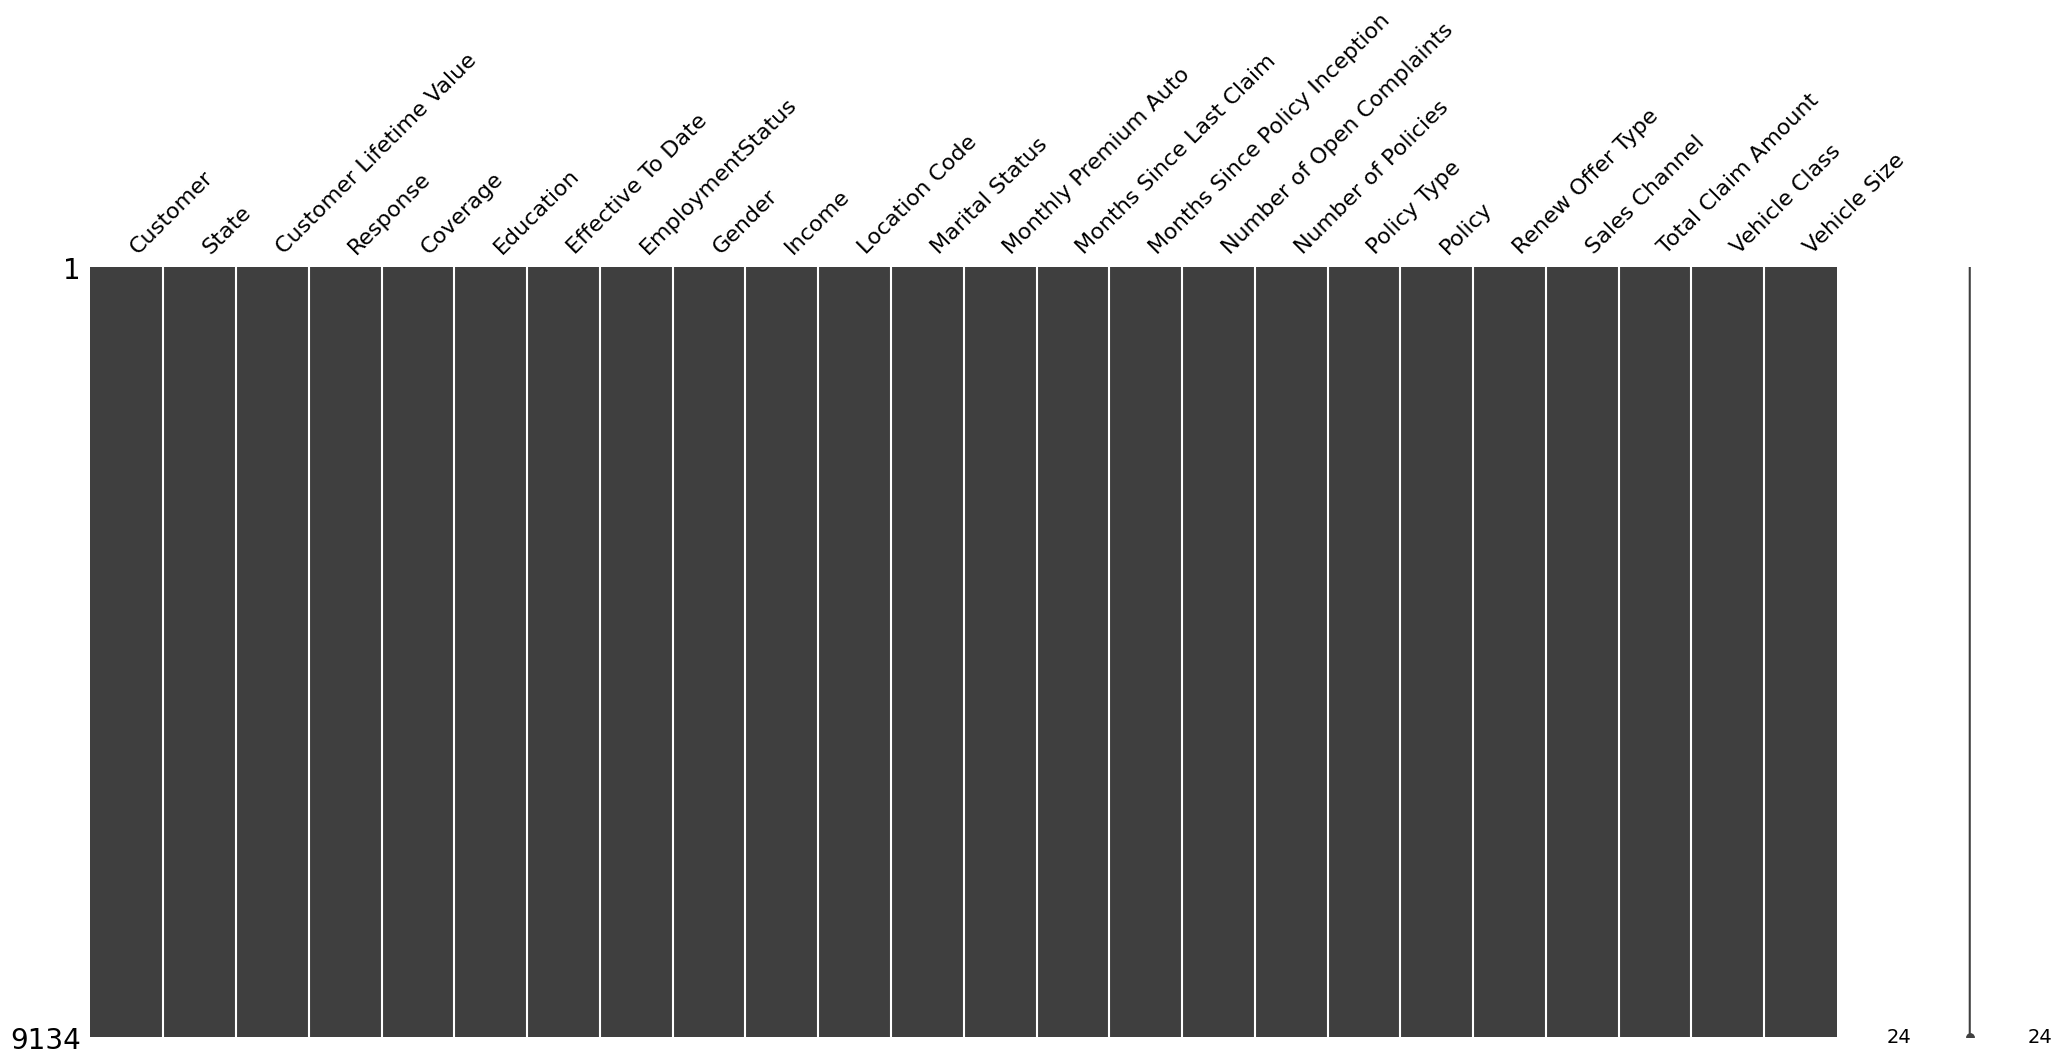

In [7]:
import missingno as msn
msn.matrix(df)

In [9]:
list(df.columns)

['Customer',
 'State',
 'Customer Lifetime Value',
 'Response',
 'Coverage',
 'Education',
 'Effective To Date',
 'EmploymentStatus',
 'Gender',
 'Income',
 'Location Code',
 'Marital Status',
 'Monthly Premium Auto',
 'Months Since Last Claim',
 'Months Since Policy Inception',
 'Number of Open Complaints',
 'Number of Policies',
 'Policy Type',
 'Policy',
 'Renew Offer Type',
 'Sales Channel',
 'Total Claim Amount',
 'Vehicle Class',
 'Vehicle Size',
 'Engaged']

In [15]:
df['Engaged'] = df['Response'].apply(lambda x:0 if x=='No' else 1)
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Engaged
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,0
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,0
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,0
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,0
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,0


## Engagement Rate

In [27]:
engagement_rate_df = pd.DataFrame(
    df.groupby('Engaged').count()['Response'] / df.shape[0] * 100
)

In [28]:
engagement_rate_df

,Response
Engaged,
0,85.679877
1,14.320123


In [29]:
engagement_rate_df.T

Engaged,0,1
Response,85.679877,14.320123


In [ ]:
engagement_by_offer_type_df = pd.pivot_table(
    df, values='Response', index='Renew Offer Type', columns='Engaged', aggfunc=len
).fillna(0.0)

engagement_by_offer_type_df.columns = ['Not Engaged', 'Engaged']

## Renew Offer Type

In [54]:
engagement_by_renew_offer_type = pd.pivot_table(
    df, values='Response', index='Renew Offer Type', columns='Engaged', aggfunc=len
).fillna(0.0)
engagement_by_renew_offer_type.columns = ['Not Engaged', 'Engaged']

In [55]:
engagement_by_renew_offer_type

,Not Engaged,Engaged
Renew Offer Type,,
Offer1,3158.0,594.0
Offer2,2242.0,684.0
Offer3,1402.0,30.0
Offer4,1024.0,0.0


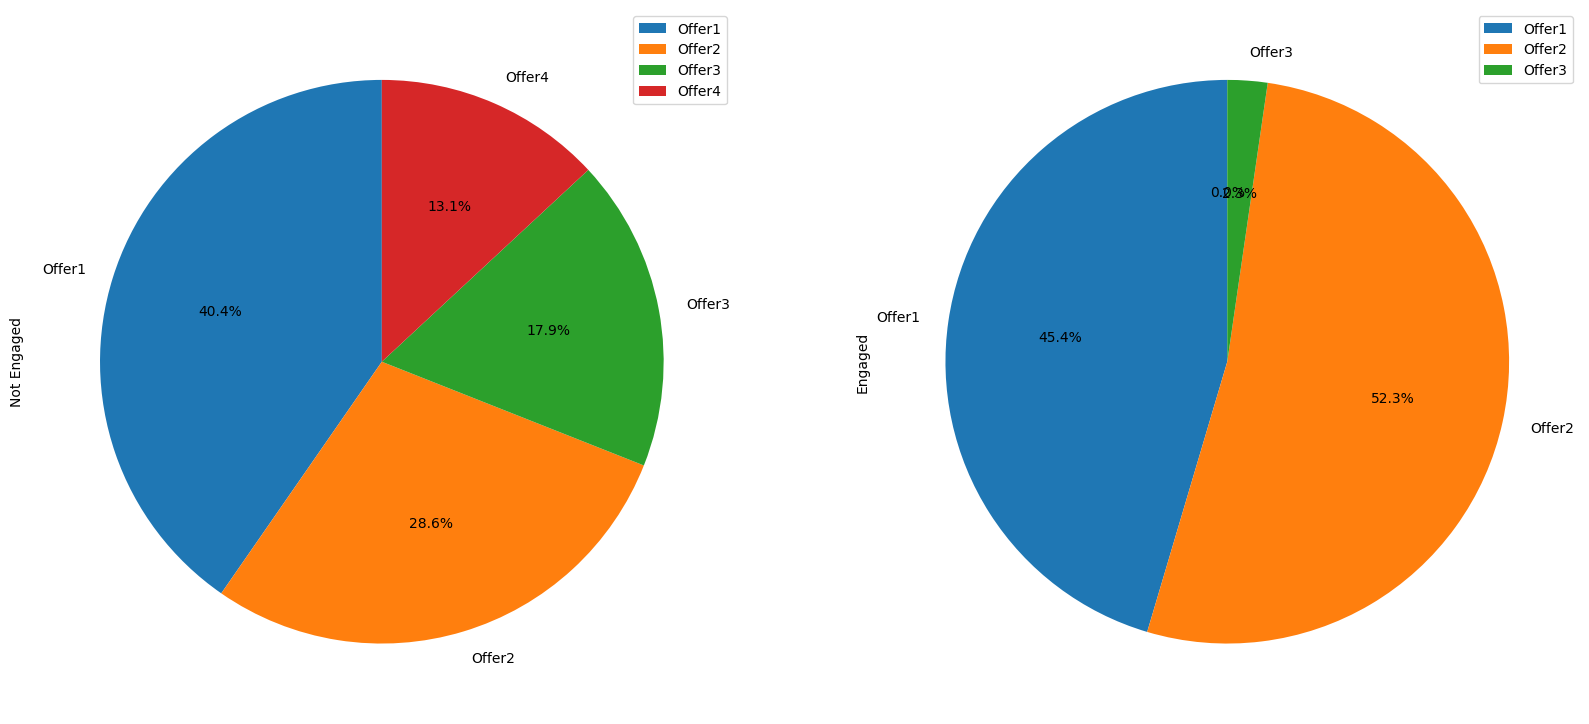

In [68]:
engagement_by_renew_offer_type.plot(
    kind='pie',
    subplots=True,
    figsize=(20, 16),
    autopct='%1.1f%%',
    startangle=90
)
plt.show()

## Sales Channel

array([<Axes: ylabel='count'>], dtype=object)

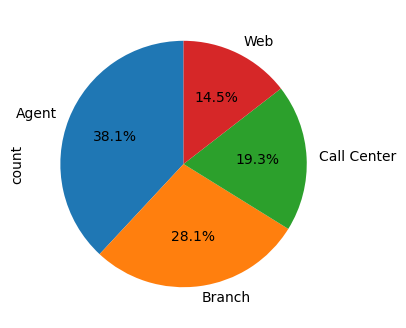

In [73]:
df['Sales Channel'].value_counts().plot(
    kind='pie',
    subplots=True,
    figsize=(6,4),
    startangle=90,
    autopct='%1.1f%%',
)

In [78]:
engagement_by_sales_channel_df = pd.pivot_table(
    df, values='Response', index='Sales Channel', columns='Engaged', aggfunc=len
)
engagement_by_sales_channel_df.columns = ['Not Engaged', 'Engaged']
engagement_by_sales_channel_df

,Not Engaged,Engaged
Sales Channel,,
Agent,2811,666
Branch,2273,294
Call Center,1573,192
Web,1169,156


In [77]:
# df.groupby(['Sales Channel', 'Engaged'])['Response'].count().unstack('Engaged').fillna(0.0)

Engaged,0,1
Sales Channel,,
Agent,2811,666
Branch,2273,294
Call Center,1573,192
Web,1169,156


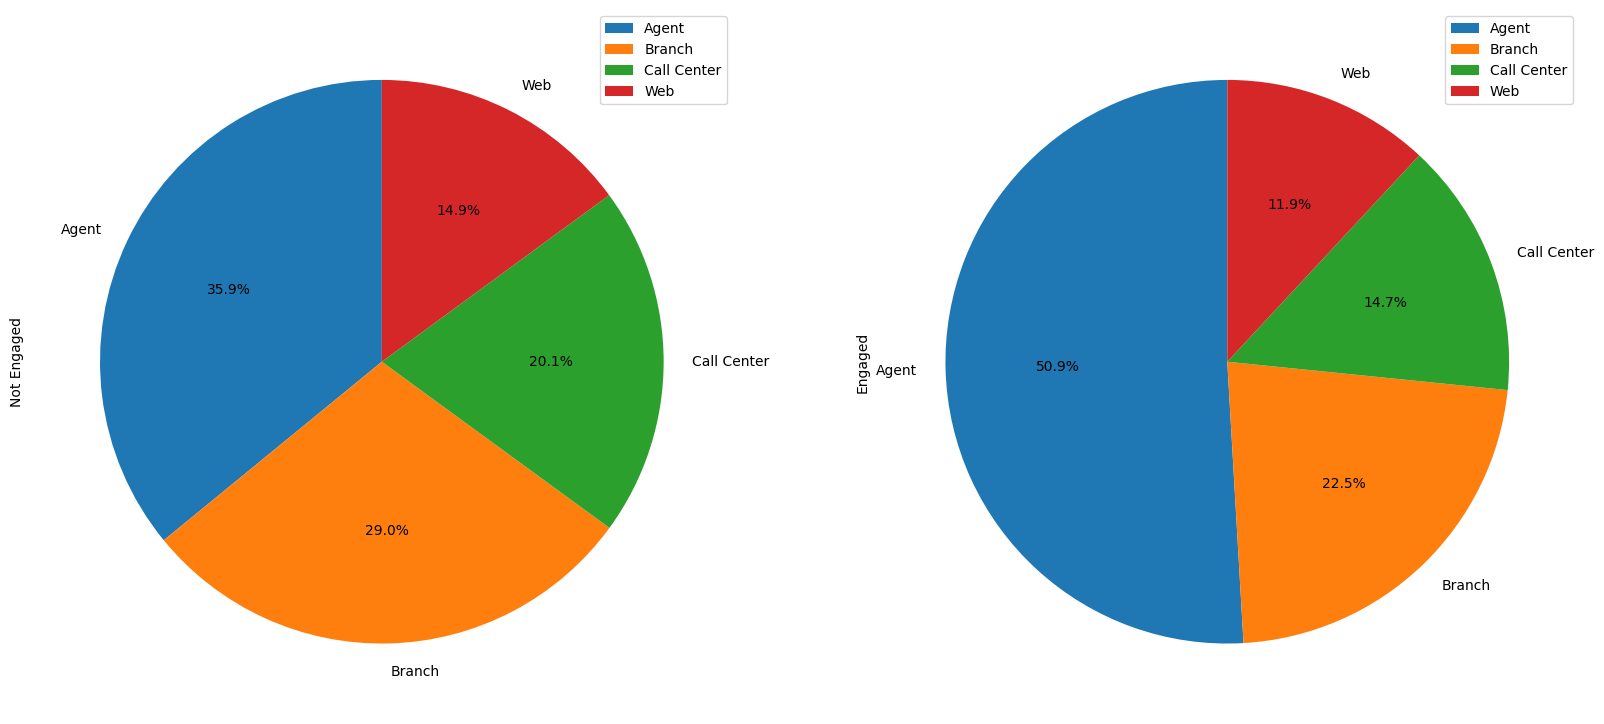

In [80]:
engagement_by_sales_channel_df.plot(
    kind='pie',
    subplots=True,
    figsize=(20,16),
    autopct='%1.1f%%',
    startangle=90,
)
plt.show()

## Total Claim Amount Distributions

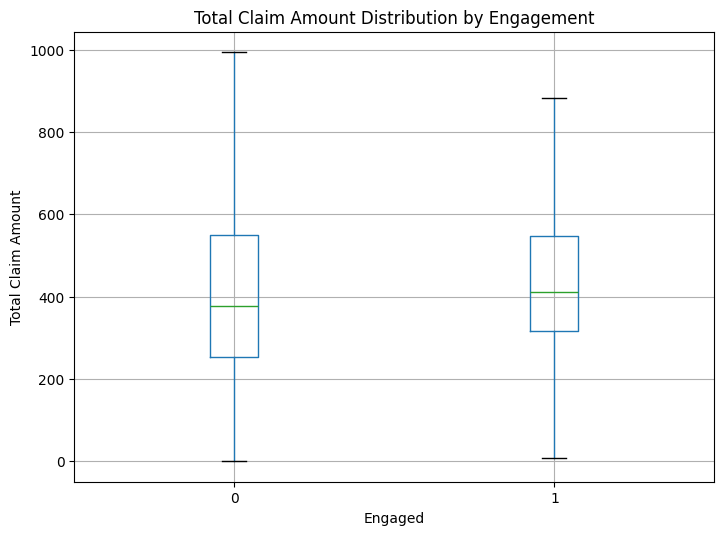

In [83]:
ax = df[['Engaged', 'Total Claim Amount']].boxplot(
    by='Engaged',
    showfliers=False,
    figsize=(8,6)
)

ax.set_xlabel('Engaged')
ax.set_ylabel('Total Claim Amount')
ax.set_title('Total Claim Amount Distribution by Engagement')

plt.suptitle("")
plt.show()

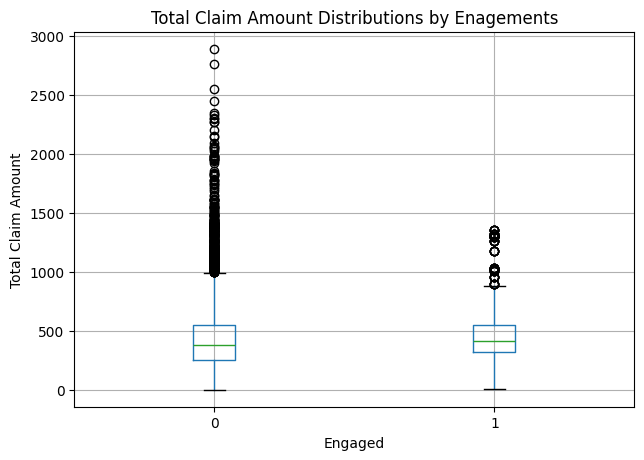

In [84]:
ax = df[['Engaged', 'Total Claim Amount']].boxplot(
    by='Engaged',
    showfliers=True,
    figsize=(7,5)
)

ax.set_xlabel('Engaged')
ax.set_ylabel('Total Claim Amount')
ax.set_title('Total Claim Amount Distributions by Enagements')

plt.suptitle("")
plt.show()

## Income Distributions

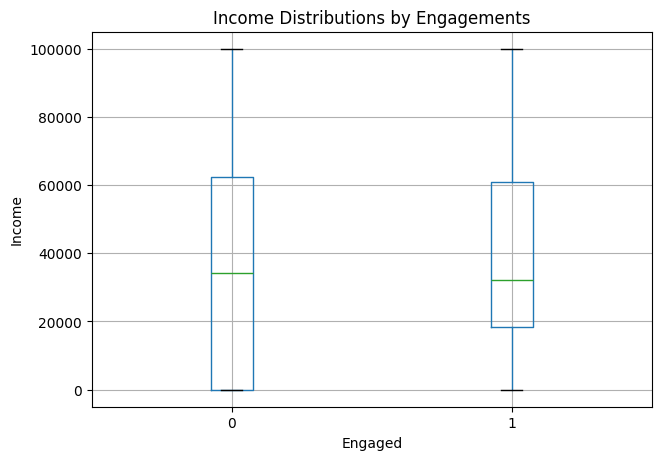

In [85]:
ax = df[['Engaged', 'Income']].boxplot(
    by='Engaged',
    showfliers=True,
    figsize=(7,5)
)

ax.set_xlabel('Engaged')
ax.set_ylabel('Income')
ax.set_title('Income Distributions by Engagements')

plt.suptitle("")
plt.show()

In [89]:
df.groupby('Engaged')['Income'].describe().T

Engaged,0,1
count,7826.000000,1308.000000
mean,37509.190008,38544.027523
std,30752.259099,28043.637944
min,0.000000,0.000000
25%,0.000000,18495.000000
50%,34091.000000,32234.000000
75%,62454.250000,60880.000000
max,99981.000000,99845.000000


## Regression Analysis

In [111]:
import statsmodels.api as sm

In [112]:
df.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,Engaged
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794,0.143201
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092,0.350297
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007,0.000000
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244,0.000000
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434,0.000000
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839,0.000000
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678,1.000000


In [125]:
continuous_var = df.select_dtypes(include=['number']).columns
list(continuous_var)

['Customer Lifetime Value',
 'Income',
 'Monthly Premium Auto',
 'Months Since Last Claim',
 'Months Since Policy Inception',
 'Number of Open Complaints',
 'Number of Policies',
 'Total Claim Amount',
 'Engaged']

In [135]:
continuous_vars = [
    'Customer Lifetime Value', 'Income', 'Monthly Premium Auto', 
    'Months Since Last Claim', 'Months Since Policy Inception', 
    'Number of Open Complaints', 'Number of Policies', 
    'Total Claim Amount'
]
continuous_vars

['Customer Lifetime Value',
 'Income',
 'Monthly Premium Auto',
 'Months Since Last Claim',
 'Months Since Policy Inception',
 'Number of Open Complaints',
 'Number of Policies',
 'Total Claim Amount']

In [132]:
logit = sm.Logit(
    df['Engaged'], 
    df[continuous_vars]
)

In [133]:
logit_fit = logit.fit()

Optimization terminated successfully.
         Current function value: 0.421189
         Iterations 6


In [134]:
logit_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Engaged   No. Observations:                 9134
Model:                          Logit   Df Residuals:                     9126
Method:                           MLE   Df Model:                            7
Date:                Tue, 14 Jan 2025   Pseudo R-squ.:                -0.02546
Time:                        21:52:04   Log-Likelihood:                -3847.1
converged:                       True   LL-Null:                       -3751.6
Covariance Type:            nonrobust   LLR p-value:                     1.000
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Customer Lifetime Value       -6.741e-06   5.04e-06     -1.337      0.181   -1.66e-05    3.14e-06
Income                        -2.857e-06   1.03e-06     -2.766      0.006   -4.88e-06   -8.33e-07
Monthly Premium Auto             -0.0084      0.001     -6.889      0.000      -0.011      -0.006
Months Since Last Claim          -0.0202      0.003     -7.238      0.000      -0.026      -0.015
Months Since Policy Inception    -0.0060      0.001     -6.148      0.000      -0.008      -0.004
Number of Open Complaints        -0.0829      0.034     -2.424      0.015      -0.150      -0.016
Number of Policies               -0.0810      0.013     -6.356      0.000      -0.106      -0.056
Total Claim Amount                0.0001      0.000      0.711      0.477      -0.000       0.000
=================================================================================================
"""

In [136]:
logit_fit.params

Customer Lifetime Value         -0.000007
Income                          -0.000003
Monthly Premium Auto            -0.008361
Months Since Last Claim         -0.020195
Months Since Policy Inception   -0.005965
Number of Open Complaints       -0.082892
Number of Policies              -0.080967
Total Claim Amount               0.000110
dtype: float64

In [138]:
import numpy as np

# Get the coefficients and sort by their absolute values
coef = logit_fit.params
ordered_coef = coef.reindex(coef.abs().sort_values(ascending=False).index)

print("Features ordered by effect size:")
print(ordered_coef)

Features ordered by effect size:
Number of Open Complaints       -0.082892
Number of Policies              -0.080967
Months Since Last Claim         -0.020195
Monthly Premium Auto            -0.008361
Months Since Policy Inception   -0.005965
Total Claim Amount               0.000110
Customer Lifetime Value         -0.000007
Income                          -0.000003
dtype: float64


## Categorical Variables

* Adding Gender

In [143]:
gender_values, gender_labels = df['Gender'].factorize()
df['GenderFactorized'] = gender_values

In [144]:
gender_labels

Index(['F', 'M'], dtype='object')

In [145]:
gender_values

array([0, 0, 0, ..., 1, 1, 1], shape=(9134,))

In [146]:
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Engaged,GenderFactorized
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,0,0
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,0,0
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,0,0
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,0,1
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,0,1


* Adding Education

In [147]:
categories = pd.Categorical(
    df['Education'], 
    categories=['High School or Below', 'Bachelor', 'College', 'Master', 'Doctor']
)

In [148]:
categories.categories

Index(['High School or Below', 'Bachelor', 'College', 'Master', 'Doctor'], dtype='object')

In [151]:
categories.codes

array([1, 1, 1, ..., 1, 2, 2], shape=(9134,), dtype=int8)

In [152]:
df['EducationFactorized'] = categories.codes

In [153]:
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Engaged,GenderFactorized,EducationFactorized
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,0,0,1
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,0,0,1
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,0,0,1
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,0,1,1
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,0,1,1


In [154]:
logit = sm.Logit(
    df['Engaged'],
    df[[
        'GenderFactorized',
        'EducationFactorized'
    ]]
)
logit_fit = logit.fit()

Optimization terminated successfully.
         Current function value: 0.493068
         Iterations 6


In [155]:
logit_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Engaged   No. Observations:                 9134
Model:                          Logit   Df Residuals:                     9132
Method:                           MLE   Df Model:                            1
Date:                Tue, 14 Jan 2025   Pseudo R-squ.:                 -0.2005
Time:                        23:00:29   Log-Likelihood:                -4503.7
converged:                       True   LL-Null:                       -3751.6
Covariance Type:            nonrobust   LLR p-value:                     1.000
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
GenderFactorized       -1.1266      0.047    -24.116      0.000      -1.218      -1.035
EducationFactorized    -0.6256      0.021    -29.900      0.000      -0.667      -0.585
=======================================================================================
"""

* As you can see in this output and by looking at the p-values in the P>|z| column, boththe GenderFactorized and EducationFactorized variables seem to have significantrelationships with the output variable Engaged. If we look at the coefficients of these twovariables, we can see that both are negatively correlated with the output. This suggests thatmale customers, encoded with 1 in the GenderFactorized variable, are less likely to beengaged with marketing calls, as compared to female customers, encoded with 0 inthe GenderFactorized variable. Similarly, the higher the customers' education levels are,the less likely that they will be engaged with marketing calls.

In [156]:
logit = sm.Logit(
    df['Engaged'], 
    df[['Customer Lifetime Value',
        'Income',
        'Monthly Premium Auto',
        'Months Since Last Claim',
        'Months Since Policy Inception',
        'Number of Open Complaints',
        'Number of Policies',
        'Total Claim Amount',
        'GenderFactorized',
        'EducationFactorized'
    ]]
)

In [157]:
logit_fit = logit.fit()
logit_fit.summary()

Optimization terminated successfully.
         Current function value: 0.420810
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Engaged   No. Observations:                 9134
Model:                          Logit   Df Residuals:                     9124
Method:                           MLE   Df Model:                            9
Date:                Tue, 14 Jan 2025   Pseudo R-squ.:                -0.02454
Time:                        23:04:13   Log-Likelihood:                -3843.7
converged:                       True   LL-Null:                       -3751.6
Covariance Type:            nonrobust   LLR p-value:                     1.000
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Customer Lifetime Value       -6.909e-06   5.03e-06     -1.373      0.170   -1.68e-05    2.96e-06
Income                         -2.59e-06   1.04e-06     -2.494      0.013   -4.63e-06   -5.55e-07
Monthly Premium Auto             -0.0081      0.001     -6.526      0.000      -0.011      -0.006
Months Since Last Claim          -0.0194      0.003     -6.858      0.000      -0.025      -0.014
Months Since Policy Inception    -0.0057      0.001     -5.827      0.000      -0.008      -0.004
Number of Open Complaints        -0.0813      0.034     -2.376      0.017      -0.148      -0.014
Number of Policies               -0.0781      0.013     -6.114      0.000      -0.103      -0.053
Total Claim Amount                0.0001      0.000      0.943      0.346      -0.000       0.000
GenderFactorized                 -0.1500      0.058     -2.592      0.010      -0.263      -0.037
EducationFactorized              -0.0070      0.027     -0.264      0.792      -0.059       0.045
=================================================================================================
"""

* Let's take a closer look at this output. The Income, Monthly Premium Auto, MonthsSince Last Claim, Months Since Policy Inception, Number of OpenComplaints, Number of Policies, and GenderFactorized variable are significant ata 0.05 significance level, and all of them have negative relationships with the outputvariable, Engaged. Hence, the higher the income is, the less likely that the customer will beengaged with marketing calls. Similarly, the more policies that the customer has, the lesslikely that he or she will be engaged with marketing calls.

* Lastly, male customers are less likely to engage with marketing calls than femalecustomers, which we can see from looking at the coefficient of GenderFactorized. Fromlooking at this regression analysis output, we can easily see the relationships between theinput and output variables, and we can understand which attributes of customers arepositively or negatively related to customer engagement with marketing calls.